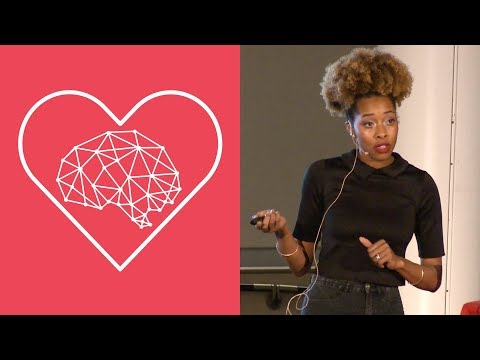

In [10]:
from IPython.display import YouTubeVideo
YouTubeVideo('olHKw9q6ybw')

In [76]:
import numpy as np
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [54]:
# URL of data to download
data_url = 'https://static-content.springer.com/esm/art%3A10.1038%2Fnature14402/MediaObjects/41586_2015_BFnature14402_MOESM287_ESM.xlsx'

# Get the data and save it locally as "data.xls"
data, headers = urllib.request.urlretrieve(data_url, './data.xls')

# Load the .xls file as a pandas DataFrame
data = pd.read_excel('data.xls')

In [149]:
fig1b = data[['oxytocin','oxytocin.1','Oxy-IRES-Cre','Oxy-IRES-Cre.1',
              'saline','saline.1','dams','dams.1']].dropna()
condition = ['oxytocin','oxytocin.1','Oxy-IRES-Cre','Oxy-IRES-Cre.1',
              'saline','saline.1','dams','dams.1']
behavior, count = fig1b.values.tolist()
behavior = [s.replace("virgins ","") for s in behavior]
condition = [c.split('.')[0] for c in condition]
fig1b = pd.DataFrame({
    'condition' : condition,
    'behavior' : behavior,
    'count' : count
})

oxytocin = pd.DataFrame({'hours' : data['oxytocin.2'].dropna().values})
oxytocin['condition'] = 'oxytocin'
oxytocin_cre =  pd.DataFrame({'hours' :data['Oxy-IRES-Cre.2'].dropna().values})
oxytocin_cre['condition'] = 'oxytocin_cre'
saline = pd.DataFrame({'hours' :data['saline.2'].dropna().values})
saline['condition'] = 'saline'
fig1c = pd.concat([saline,oxytocin,oxytocin_cre])

oxytocin = pd.DataFrame({'p_retrieval' : data['oxytocin.3'].dropna().values})
oxytocin['condition'] = 'oxytocin'
oxytocin_cre =  pd.DataFrame({'p_retrieval' :data['Oxy-IRES-Cre.3'].dropna().values})
oxytocin_cre['condition'] = 'oxytocin_cre'
saline = pd.DataFrame({'p_retrieval' :data['saline.3'].dropna().values})
saline['condition'] = 'saline'
dams = pd.DataFrame({'p_retrieval' :data['dams.2'].dropna().values})
dams['condition'] = 'dams'
fig1d_left = pd.concat([saline,oxytocin,oxytocin_cre,dams])

oxytocin = pd.DataFrame({'seconds' : data['oxytocin.4'].dropna().values})
oxytocin['condition'] = 'oxytocin'
oxytocin_cre =  pd.DataFrame({'seconds' :data['Oxy-IRES-Cre.4'].dropna().values})
oxytocin_cre['condition'] = 'oxytocin_cre'
saline = pd.DataFrame({'seconds' :data['saline.4'].dropna().values})
saline['condition'] = 'saline'
dams = pd.DataFrame({'seconds' :data['dams.3'].dropna().values})
dams['condition'] = 'dams'
fig1d_right = pd.concat([saline,oxytocin,oxytocin_cre,dams])

oxytocin = pd.DataFrame({'days' : data['oxytocin.5'].dropna().values})
oxytocin['condition'] = 'oxytocin'
saline = pd.DataFrame({'days' :data['saline.5'].dropna().values})
saline['condition'] = 'saline'
fig1e = pd.concat([saline,oxytocin]).replace('no retrieval',np.NaN)

Figure 1b

Figure 1e

In [170]:
n_oxy = len(fig1e[fig1e['condition']=='oxytocin'])
n_oxy_noretrieval = fig1e[fig1e['condition']=='oxytocin'].days.isna().sum()

n_saline = len(fig1e[fig1e['condition']=='saline'])
n_saline_noretrieval = fig1e[fig1e['condition']=='saline'].days.isna().sum()

In [171]:
print('maximum percent retrieving mothers given oxytocin = ' + str(1-(n_oxy_noretrieval/n_oxy)))
print('maximum percent retrieving mothers given saline = ' + str(1-(n_saline_noretrieval/n_saline)))

maximum percent retrieving mothers given oxytocin = 0.4736842105263158
maximum percent retrieving mothers given saline = 0.125


In [184]:
days = np.arange(0,10)
p_retrieving_saline = [sum(fig1e[fig1e['condition']=='saline'].days<=d)/n_oxy for d in days]
p_retrieving_oxytocin = [sum(fig1e[fig1e['condition']=='oxytocin'].days<=d)/n_oxy for d in days]

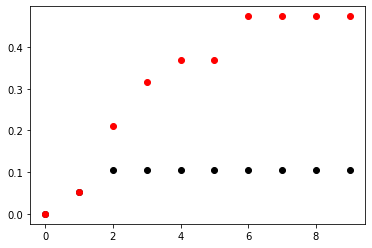

In [185]:
plt.scatter(days,p_retrieving_saline,color = 'black')
plt.scatter(days,p_retrieving_oxytocin,color = 'red')

What does this demonstrate about the relative necessity for oxytocin and example mothering in pup retrieval behavior?

In the following cell, create a plot that would demonstrate the following statement: "Isolated virgins receiving oxytocin injections began retrieving earlier than saline-injected virgins, although slower than cohoused virgins " <br> 
(you can add more cells rather than doing it all in one) <br>
Hint: need to compare data from fig1e with data from fig1c

In [7]:
!pip install IPython==7.16.1
from IPython.display import Video

vidfile="https://static-content.springer.com/esm/art%3A10.1038%2Fnature14402/MediaObjects/41586_2015_BFnature14402_MOESM305_ESM.wmv"
Video(vidfile)
